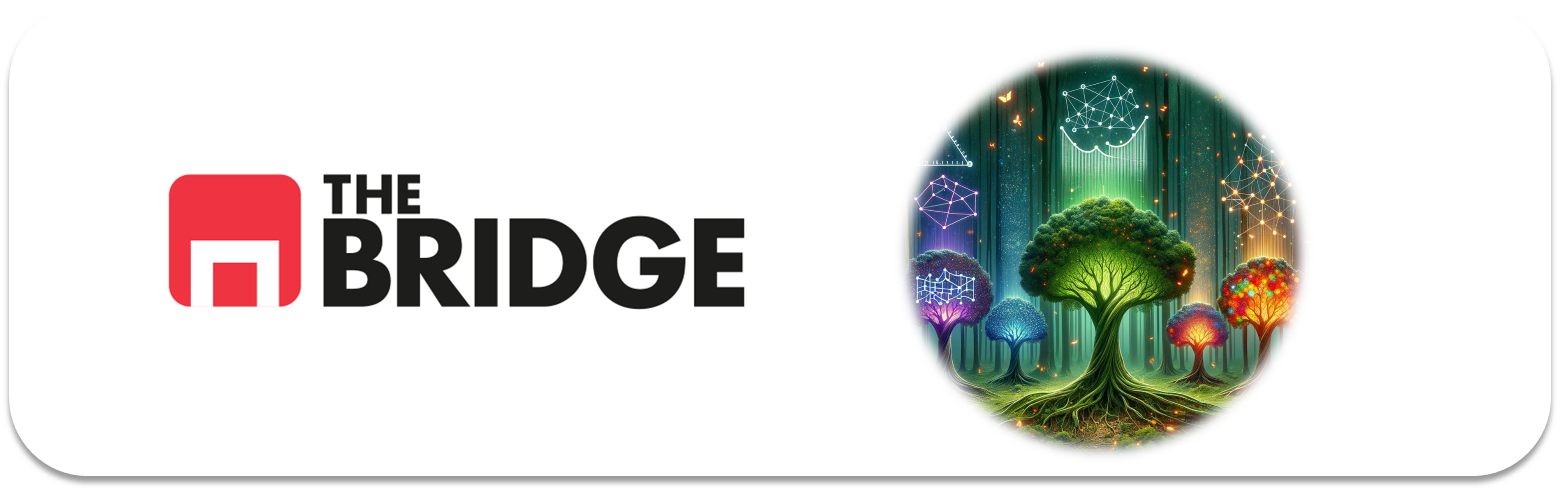

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de Hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

In [3]:
df = pd.read_csv('data/bank-full.csv', sep = ";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Busqué el Dataset en google y la columna 17 "y" es si el cliente contrató el deposito a plazos, así que la he elegido como target.

target = df["y"]

In [8]:
# Conteo absoluto
y_counts = target.value_counts()

# Porcentaje
y_percentage = target.value_counts(normalize=True) * 100

y_counts, y_percentage

(y
 no     39922
 yes     5289
 Name: count, dtype: int64,
 y
 no     88.30152
 yes    11.69848
 Name: proportion, dtype: float64)

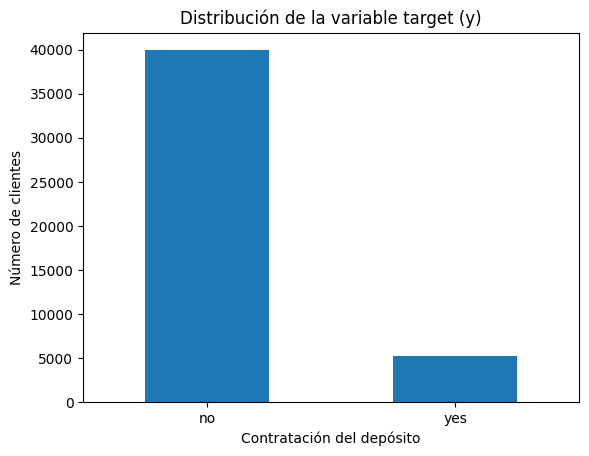

In [10]:
df['y'].value_counts().plot(kind='bar')
plt.title('Distribución de la variable target (y)')
plt.xlabel('Contratación del depósito')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Ahora analizo target vs las otras variables. 

In [ ]:
# Variables categóricas
cat_vars = ['job', 'marital', 'education', 'default','housing', 'loan', 'contact', 'month', 'poutcome']

# Variables numéricas
num_vars = ['age', 'balance', 'day', 'duration','campaign', 'pdays', 'previous']

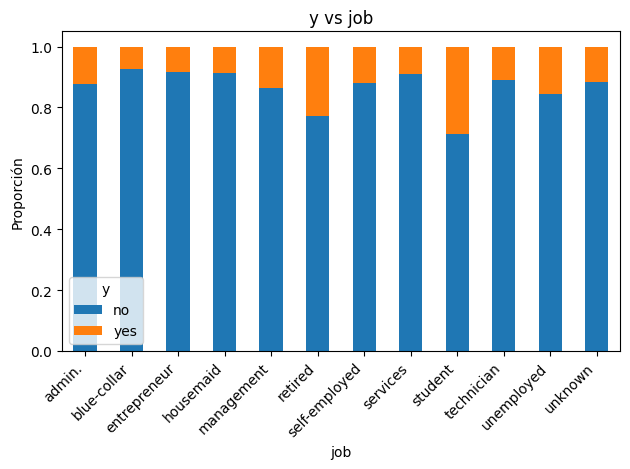

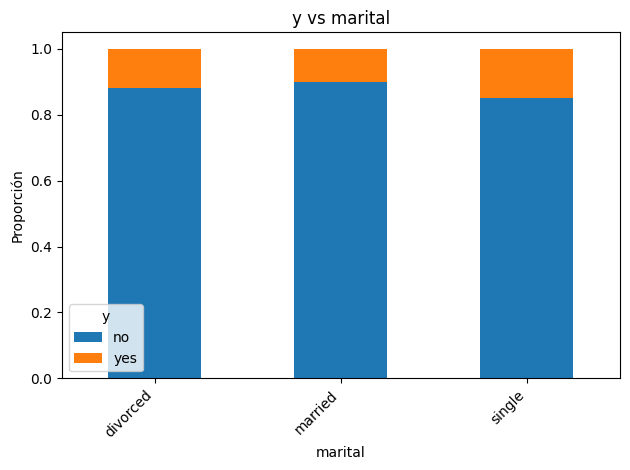

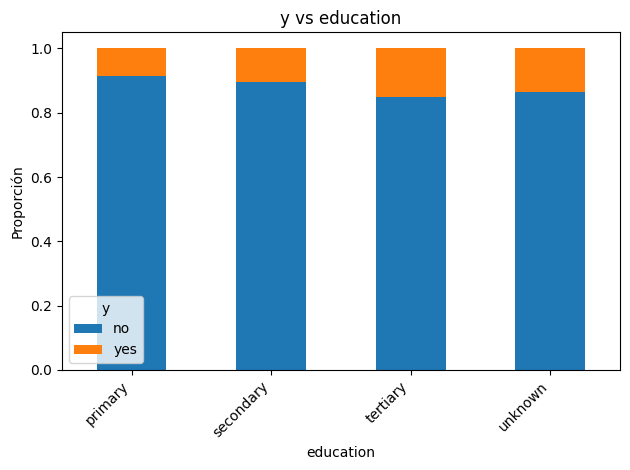

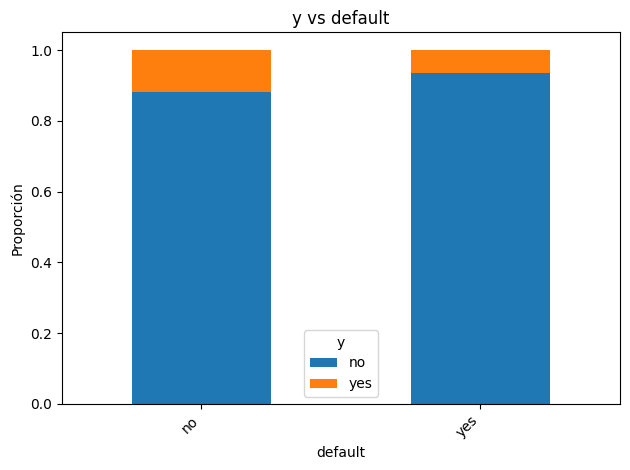

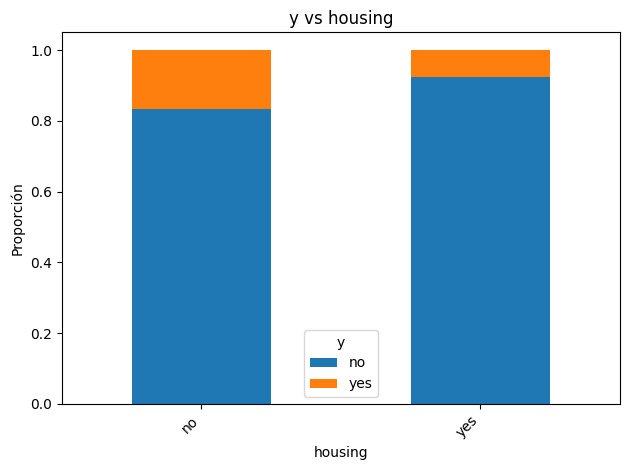

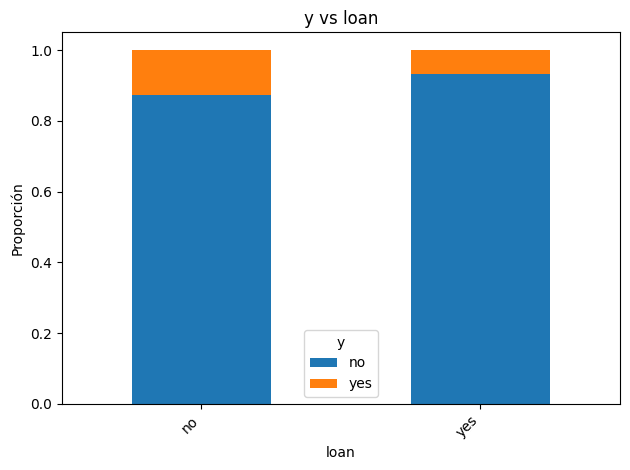

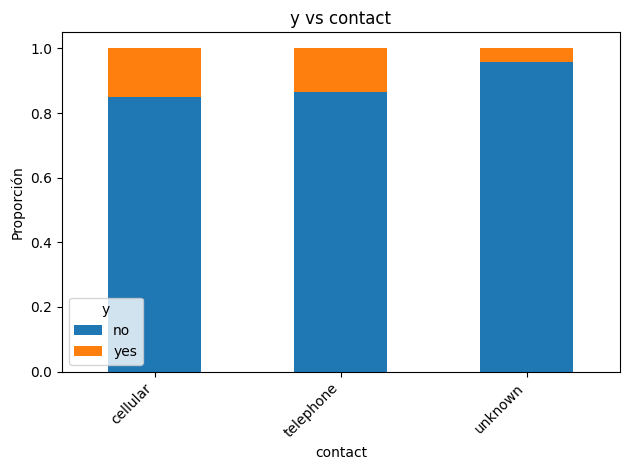

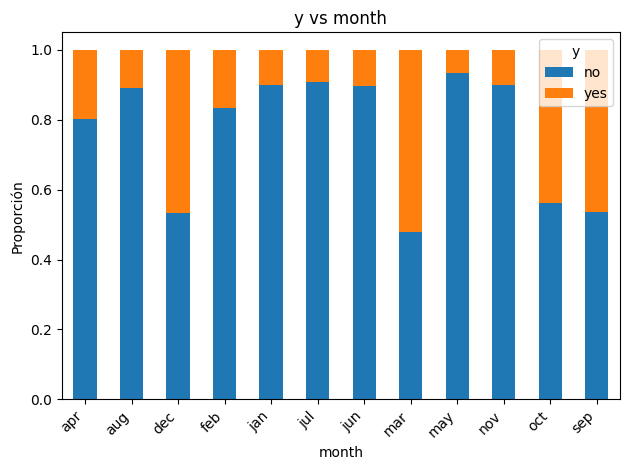

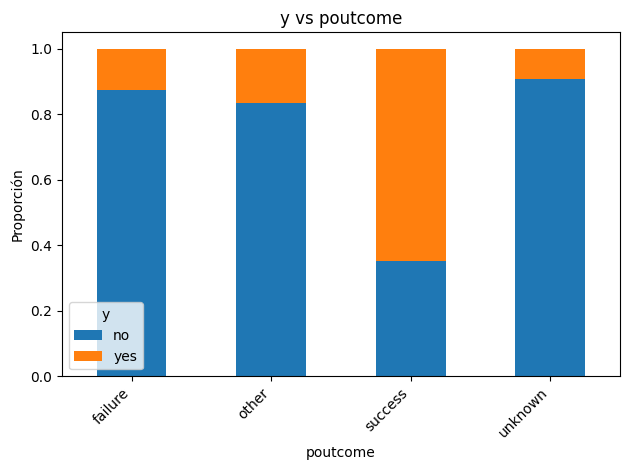

In [13]:
for col in cat_vars:
    prop = pd.crosstab(df[col], df['y'], normalize='index')

    prop.plot(kind='bar', stacked=True)
    plt.title(f'y vs {col}')
    plt.ylabel('Proporción')
    plt.legend(title='y')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

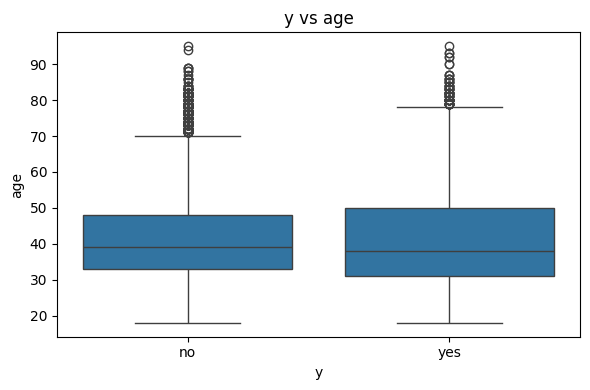

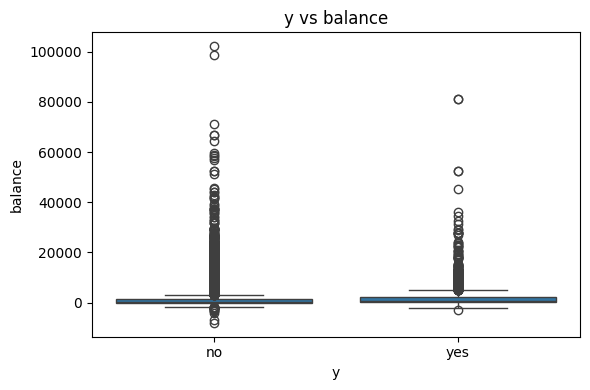

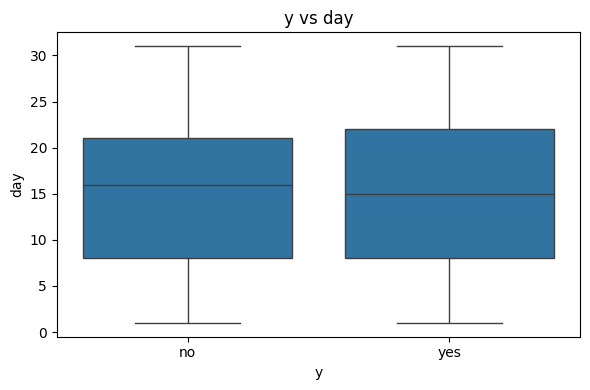

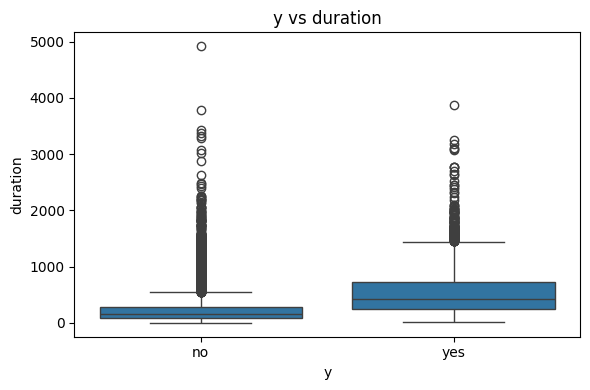

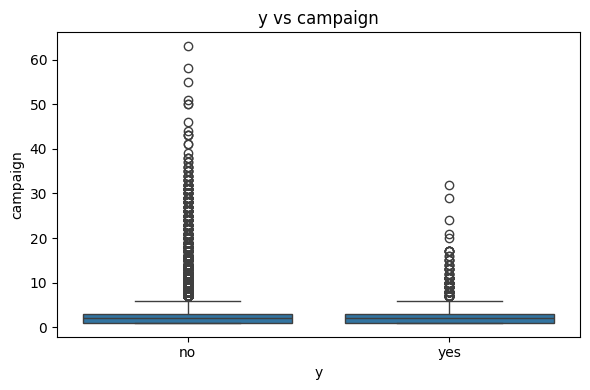

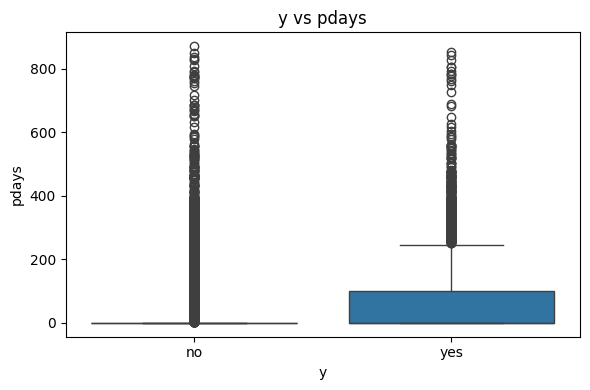

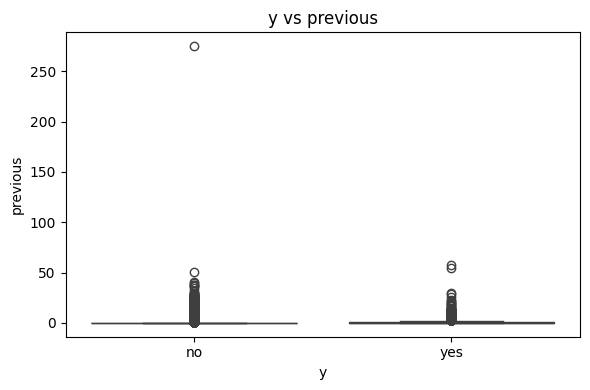

In [14]:
for col in num_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'y vs {col}')
    plt.tight_layout()
    plt.show()

In [15]:
df['y_bin'] = df['y'].map({'no': 0, 'yes': 1})
corr_target = df[num_vars + ['y_bin']].corr()['y_bin'].sort_values(ascending=False)
corr_target

y_bin       1.000000
duration    0.394521
pdays       0.103621
previous    0.093236
balance     0.052838
age         0.025155
day        -0.028348
campaign   -0.073172
Name: y_bin, dtype: float64

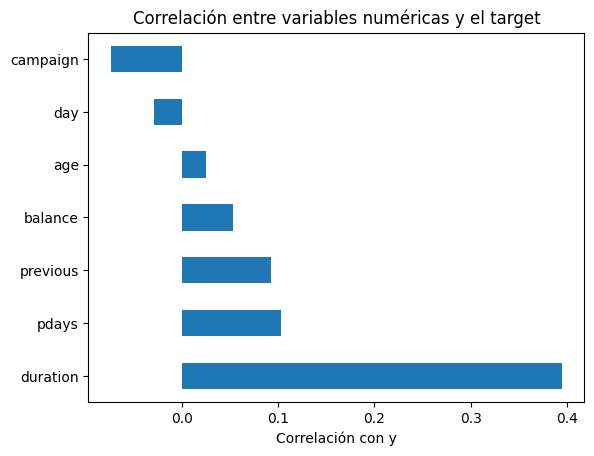

In [16]:
corr_target.drop('y_bin').plot(kind='barh')
plt.title('Correlación entre variables numéricas y el target')
plt.xlabel('Correlación con y')
plt.show()

In [ ]:
# Chi-cuadrado + p-value

from scipy.stats import chi2_contingency
chi_results = []

for col in cat_vars:
    table = pd.crosstab(df[col], df['y'])
    chi2, p, _, _ = chi2_contingency(table)
    chi_results.append((col, chi2, p))

chi_df = pd.DataFrame(chi_results, columns=['variable', 'chi2', 'p_value'])
chi_df.sort_values('chi2', ascending=False)

,variable,chi2,p_value
8,poutcome,4391.506589,0.000000e+00
7,month,3061.838938,0.000000e+00
6,contact,1035.714225,1.251738e-225
4,housing,874.822449,2.918798e-192
0,job,836.105488,3.337122e-172
2,education,238.923506,1.626656e-51
5,loan,209.616980,1.665061e-47
1,marital,196.495946,2.145100e-43
3,default,22.202250,2.453861e-06


In [19]:
X = df.drop(columns=['y', 'y_bin'])
y = df['y_bin']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [27]:
num_cols = [
    'age', 'balance', 'campaign', 'pdays', 'previous'
]

cat_cols = [
    'job', 'marital', 'education', 'default',
    'housing', 'loan', 'contact', 'month', 'poutcome'
]

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [31]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [25]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 10, 50, 100],
    'min_samples_leaf': [1, 5, 10, 50],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

In [33]:
# Modelo base
dt = DecisionTreeClassifier(random_state=42)

# GridSearch
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Entrenamiento SOLO con train
grid_search.fit(X_train, y_train)

# Mejor modelo
best_dt = grid_search.best_estimator_

print("Mejores hiperparámetros:")
print(grid_search.best_params_)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Mejores hiperparámetros:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 100}


In [ ]:
# Comparar con el modelo baseline

In [34]:
# Evaluar contra el test

y_test_pred = grid_search.predict(X_test)

In [ ]:
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7985
           1       0.38      0.54      0.45      1058

    accuracy                           0.84      9043
   macro avg       0.66      0.71      0.68      9043
weighted avg       0.87      0.84      0.85      9043



In [ ]:
print(confusion_matrix(y_test, y_test_pred))

[[7049  936]
 [ 486  572]]


In [40]:
from sklearn.metrics import roc_auc_score

y_test_proba = grid_search.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_test_proba)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.7680958389608115


AUROC: 0.77


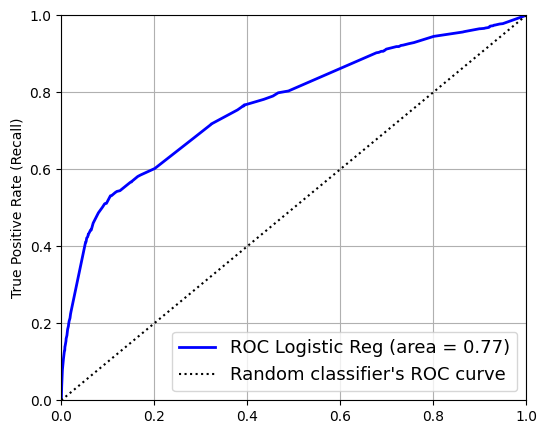

In [41]:
from sklearn.metrics import roc_curve, auc
scores = grid_search.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()